In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/loan-approval-classification-data/loan_data.csv


In [25]:
df = pd.read_csv("/kaggle/input/loan-approval-classification-data/loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [26]:
print("Basic Statisctics")
print(df.describe())
print("\nNull?")
print(df.isnull().sum())
print("\nDuplicate?")
print(df.duplicated().sum())
print("\nData Types")
print(df.info())

Basic Statisctics
         person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25% 

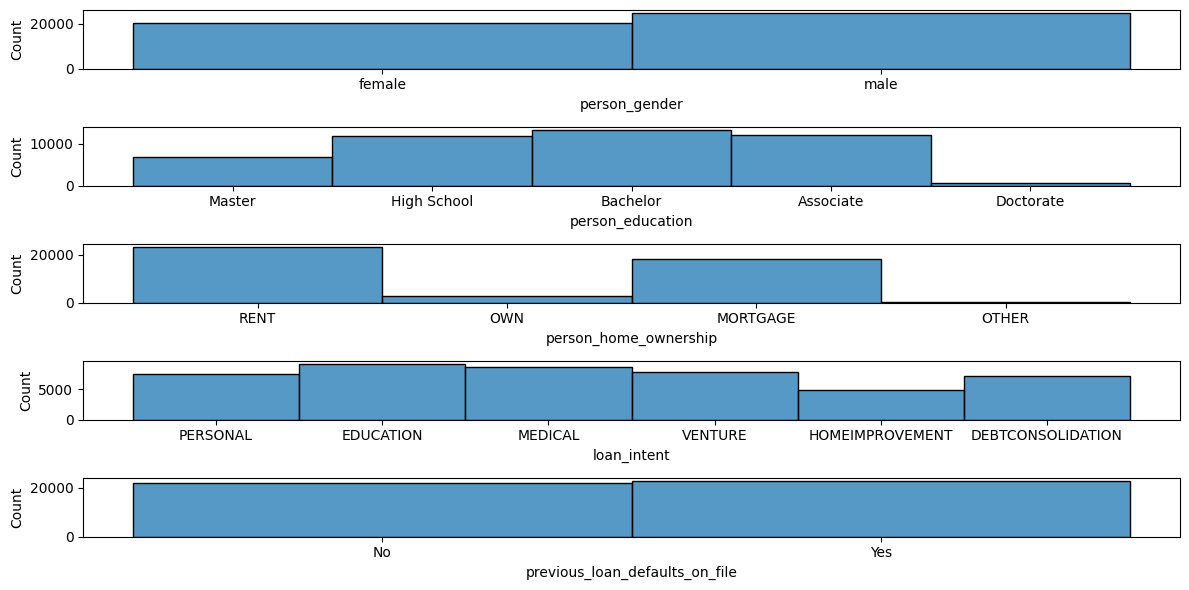

In [27]:
categorical = df.select_dtypes(include = 'object').columns

plt.figure(figsize = (12,6))
for i, col in enumerate(categorical):
    plt.subplot(5,1, i + 1)
    sns.histplot(df[col])

plt.tight_layout()

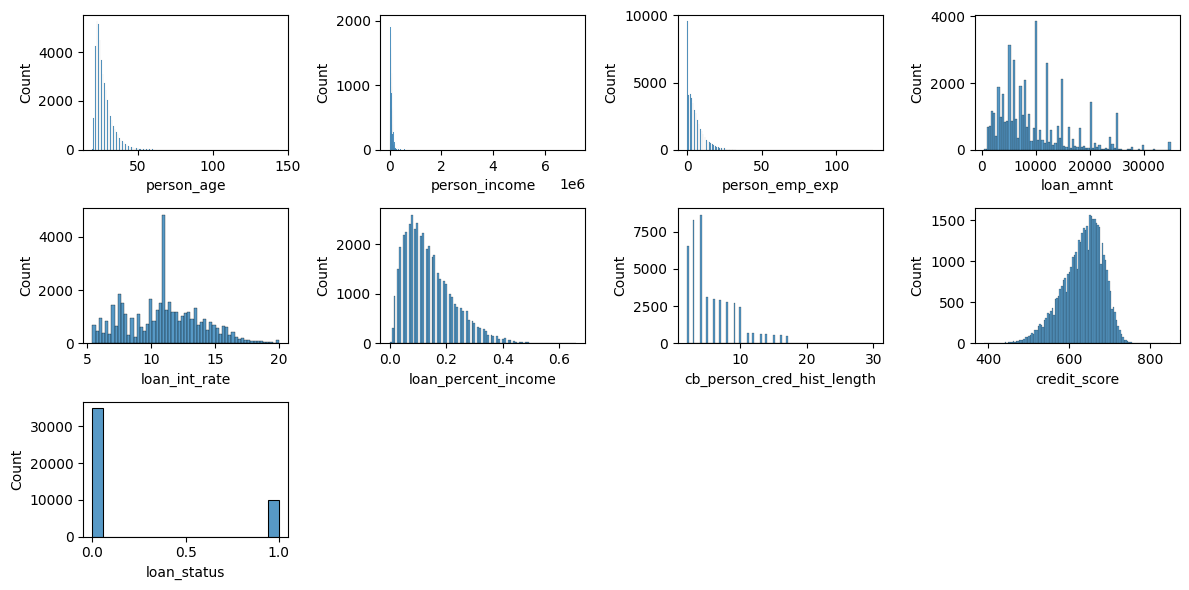

In [28]:
numerical = df.select_dtypes(include = 'number').columns

plt.figure(figsize = (12,6))
for i, col in enumerate(numerical):
    plt.subplot(3,4, i + 1)
    sns.histplot(df[col])

plt.tight_layout()
plt.show()

In [29]:
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [30]:
features = df.drop('loan_status', axis = 1)
target = df['loan_status']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [39]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb = XGBClassifier(tree_method='gpu_hist', use_label_encoder=False, eval_metric='logloss', enable_categorical = True)

xgb_cv = GridSearchCV(xgb, param_grid, cv = 5, scoring= "accuracy")    
xgb_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=N...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [41]:
print("XGB Classifier With GridSearchCV")

print("\nTuned Hyperparameter : {}".format(xgb_cv.best_params_))
print("Best Accuracy : {}".format(xgb_cv.best_score_))

y_pred = xgb_cv.predict(x_test)

print("\nClassification Report")
print(classification_report(y_test, y_pred))


XGB Classifier With GridSearchCV

Tuned Hyperparameter : {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best Accuracy : 0.9333333333333333

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.90      0.80      0.85      2010

    accuracy                           0.94      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.94      0.93      9000

